# ALGORITMO K-MEANS

Ejemplo del algoritmo de Machine Learning de aprendizaje no supervizado "K-means" para el dataset "Iris"

Primero se importa las librerias necesarias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import sklearn
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.metrics import accuracy_score

Se carga el dataset Iris

In [2]:
Iris = datasets.load_iris()
print(dir(Iris))

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']


Se imprime los datos de Iris

In [3]:
print(Iris.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

Se imprime los nombres de cada columna

In [4]:
print(Iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


Se imprime la clasificación de Iris

In [5]:
print(Iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Se imprime los tipos de Iris

In [6]:
print(Iris.target_names)

['setosa' 'versicolor' 'virginica']


Se visualiza los datos como un Data Frame

In [7]:
dkm = pd.DataFrame(Iris.data)
dkm.columns = ['Longitud_Sépalo','Ancho_Sépalo','Longitud_Pétalo','Ancho_Pétalo']
dkm

,Longitud_Sépalo,Ancho_Sépalo,Longitud_Pétalo,Ancho_Pétalo
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Se visualiza la clasificacion como un Data Frame

In [8]:
d = pd.DataFrame(Iris.target)
d.columns = ['TipoFlor']
d

,TipoFlor
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


Se agrupa los datos utilizando k-means

In [9]:
agrupacion = KMeans(n_clusters=3)
agrupacion.fit(dkm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Se imprime los datos de la agrupación

In [10]:
agrupacion.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

Se encuentra los centros de las agrupaciones

In [11]:
agrupacion.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

# Gráficos

Se muestra el gráfico de todos los datos, respecto al ancho y la longitud del pétalo

Text(0, 0.5, 'Ancho del Pétalo')

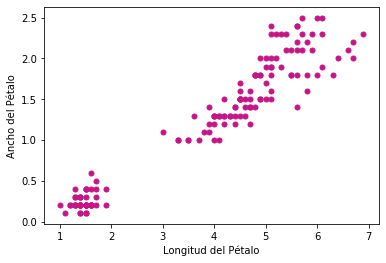

In [12]:
plt.scatter(dkm.Longitud_Pétalo, dkm.Ancho_Pétalo, c='mediumvioletred',s=25)
plt.xlabel('Longitud del Pétalo')
plt.ylabel('Ancho del Pétalo')

Se grafica la clasificación real de Iris

Text(0, 0.5, 'Ancho del Pétalo')

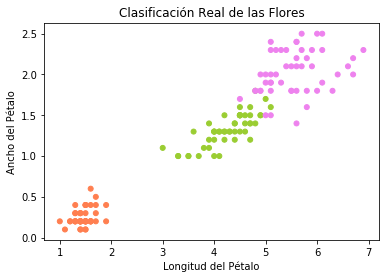

In [13]:
color = np.array(['coral','yellowgreen','violet'])
plt.scatter(dkm.Longitud_Pétalo, dkm.Ancho_Pétalo, c=color[d.TipoFlor],s=25)
plt.title('Clasificación Real de las Flores')
plt.xlabel('Longitud del Pétalo')
plt.ylabel('Ancho del Pétalo')

Se grafica la clasificacion de Iris con k-means

Text(0, 0.5, 'Ancho del Pétalo')

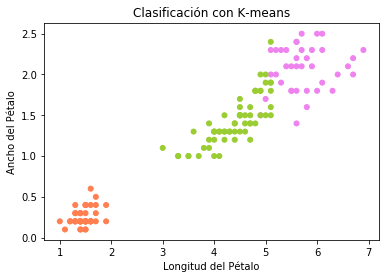

In [14]:
plt.scatter(dkm.Longitud_Pétalo, dkm.Ancho_Pétalo, c=color[agrupacion.labels_],s=25)
plt.title('Clasificación con K-means')
plt.xlabel('Longitud del Pétalo')
plt.ylabel('Ancho del Pétalo')

Se comprueba la exactitud

In [15]:
target_kmeans = np.choose(agrupacion.labels_,[0,1,2]).astype(np.int64)
print(target_kmeans)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [16]:
print(accuracy_score(Iris.target, target_kmeans))

0.8933333333333333
